<a href="https://colab.research.google.com/github/sRajdeep617/Cyberbullying-Tweets-Classification/blob/main/Cyberbullying_Tweets_Classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/Cyberbullying Tweets Classification/cyberbullying_tweets.csv')
df.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

Let's see all the labels

In [4]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [5]:
df = df.rename(columns={"tweet_text":"text","cyberbullying_type":"sentiment"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       47692 non-null  object
 1   sentiment  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


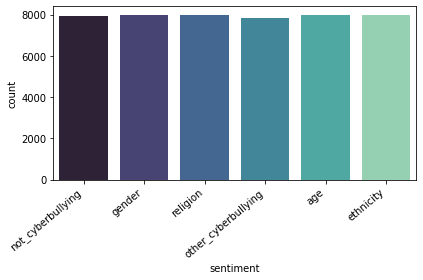

In [6]:
axes = sns.countplot(x = "sentiment", data = df, palette = 'mako')

axes.set_xticklabels(axes.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()
plt.show()

Checking for null

In [7]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

# Data Cleaning


In [8]:
# function for cleaning tweets

def clean_tweets(df, field):
  df[field] = df[field].str.replace(r'http\S+', " ")
  df[field] = df[field].str.replace(r'http+', " ")
  df[field] = df[field].str.replace(r'@', "at")
  df[field] = df[field].str.replace('#[A-Za-z0-9]+', " ")
  df[field] = df[field].str.replace(r"[^A-Za-z(),!?@\'\"_\n]", " ")
  df[field] = df[field].str.lower()

  return df  

In [9]:
clean_tweets(df, "text")

text          sentiment
0        in other words  , your food was crapilicious!    not_cyberbullying
1                   why is   so white?                    not_cyberbullying
2      atxochitlsuckkks a classy whore? or more red v...  not_cyberbullying
3      atjason_gio meh   p  thanks for the heads up, ...  not_cyberbullying
4      atrudhoeenglish this is an isis account preten...  not_cyberbullying
...                                                  ...                ...
47687  black ppl aren't expected to do anything, depe...          ethnicity
47688  turner did not withhold his disappointment  tu...          ethnicity
47689  i swear to god  this dumb nigger bitch  i have...          ethnicity
47690  yea fuck you rt attherealexel  if youre a nigg...          ethnicity
47691  bro  u gotta chill rt atchillshrammy  dog fuck...          ethnicity

[47692 rows x 2 columns]

In [10]:
!pip install emoji

     |████████████████████████████████| 175 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=85a66988017924e324832d5a3a2af79899167f740e377bc4c5a598d5f1be7306
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [11]:
# Applying Lemmmatizer to remove tenses from texts.
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import STOPWORDS
import emoji

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will'])
corpus = []

def preprocess_tweets(tweet):
  tweet = re.sub(r"won\'t", "will not", tweet)
  tweet = re.sub(r"can\'t", "can not", tweet)
  tweet = re.sub(r"n\'t", "not", tweet)
  tweet = re.sub(r"\'re", "are", tweet)
  tweet = re.sub(r"\'s", "is", tweet)
  tweet = re.sub(r"\'d", "would", tweet)
  tweet = re.sub(r"\'ll", " will", tweet)
  tweet = re.sub(r"\'t", " not", tweet)
  tweet = re.sub(r"\'ve", " have", tweet)
  tweet = re.sub(r"\'m", " am", tweet)
  tweet = re.sub('[^a-zA-Z]', ' ' , tweet)
  tweet = re.sub(emoji.get_emoji_regexp(), '', tweet)
  tweet = re.sub(r'[^\x00-\x7f]', '', tweet)
  tweet = " ".join([stemmer.stem(word) for word in tweet.split()])
  tweet = [lemmatizer.lemmatize(word) for word in tweet.split() if not word in set(STOPWORDS)]
  tweet = ' '.join(tweet)

  return tweet

df['clean_text'] = df['text'].apply(preprocess_tweets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
df.head()

text          sentiment  \
0    in other words  , your food was crapilicious!    not_cyberbullying   
1               why is   so white?                    not_cyberbullying   
2  atxochitlsuckkks a classy whore? or more red v...  not_cyberbullying   
3  atjason_gio meh   p  thanks for the heads up, ...  not_cyberbullying   
4  atrudhoeenglish this is an isis account preten...  not_cyberbullying   

                                          clean_text  
0                                word food crapilici  
1                                          whi white  
2     atxochitlsuckkk classi whore red velvet cupcak  
3  atjason gio meh thank head concern anoth angri...  
4  atrudhoeenglish isi account pretend kurdish ac...

# EDA

In [13]:
# checking and removing duplicates
df['clean_text'].duplicated().sum()

2572

In [14]:
df.drop_duplicates('clean_text', inplace = True)
print(df['clean_text'].duplicated().sum())

0


In [15]:
df['sentiment'].value_counts()

religion               7943
age                    7866
ethnicity              7830
not_cyberbullying      7777
gender                 7656
other_cyberbullying    6048
Name: sentiment, dtype: int64

In [16]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

CloudWord for each cybullying type

In [17]:
def cloudWord(type):
  plt.figure(figsize=(20,20))
  wordcloud = WordCloud(min_font_size = 10, max_words = 2000, width=1600 , height = 800 , background_color = 'white').generate(" ".join(df[df['sentiment'] == type].clean_text))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

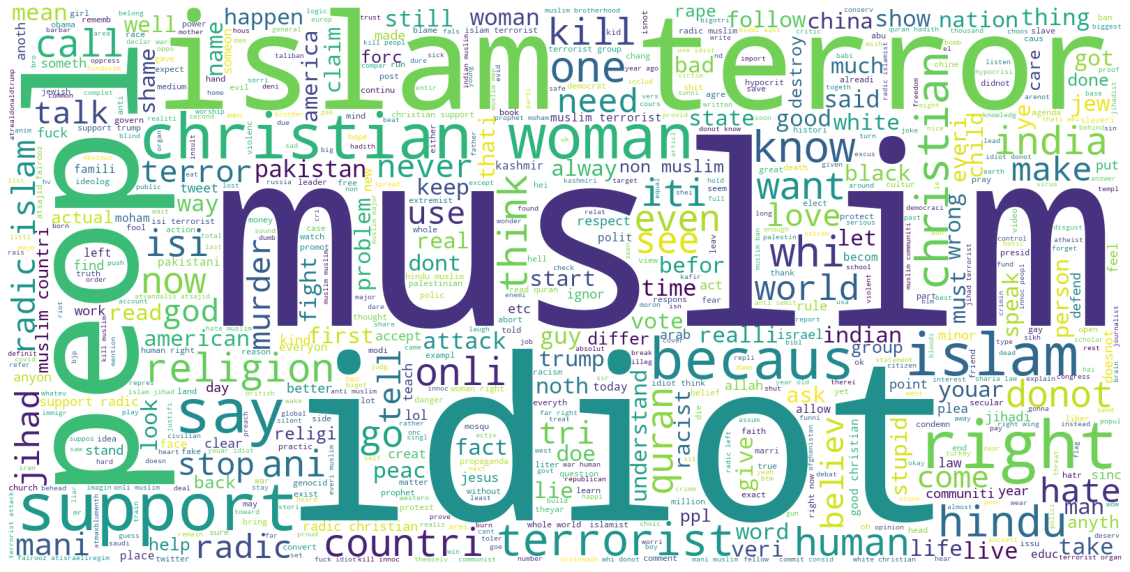

In [18]:
# for religion
cloudWord('religion')

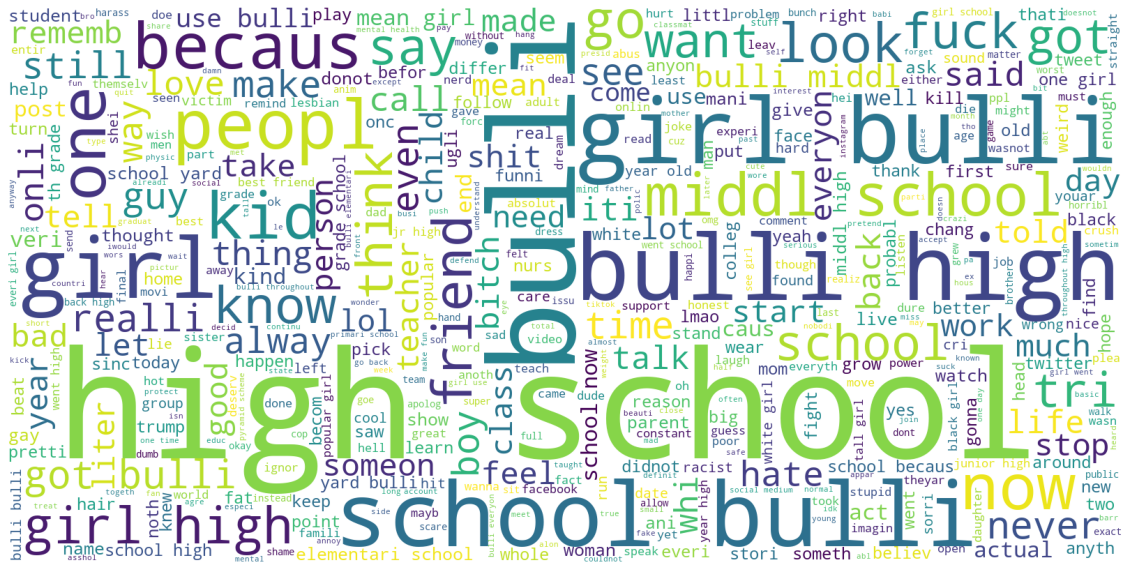

In [19]:
# for age
cloudWord('age')

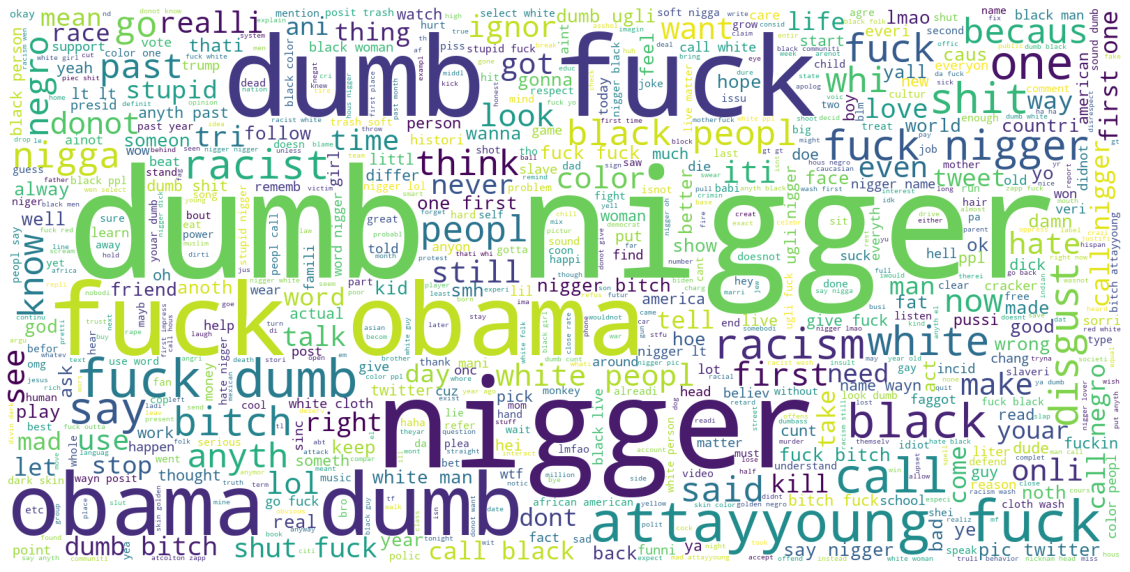

In [20]:
# for ethnicity
cloudWord('ethnicity')

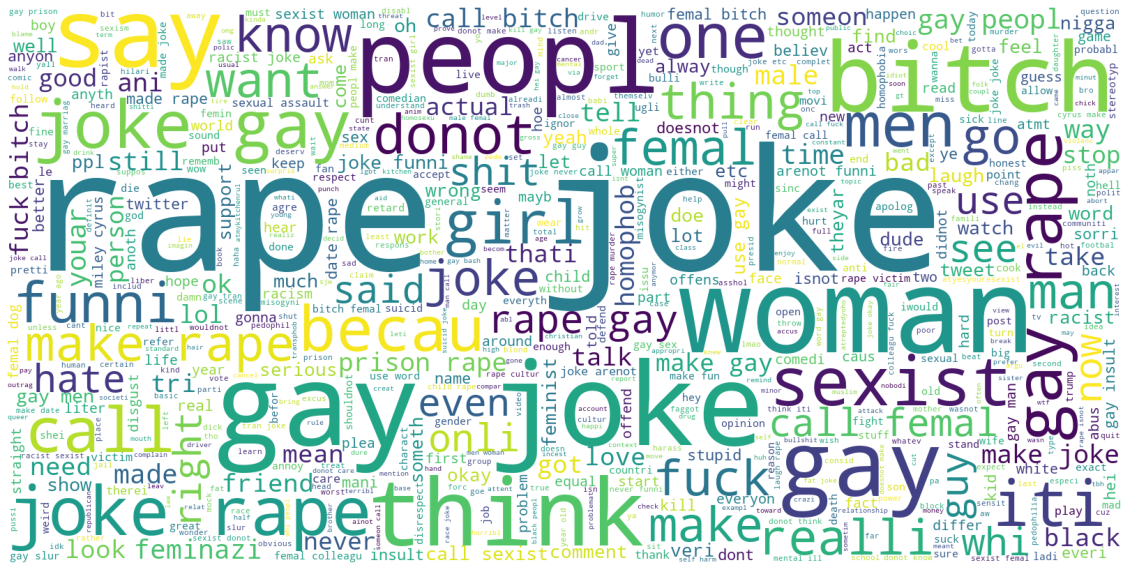

In [21]:
# for gender
cloudWord('gender')

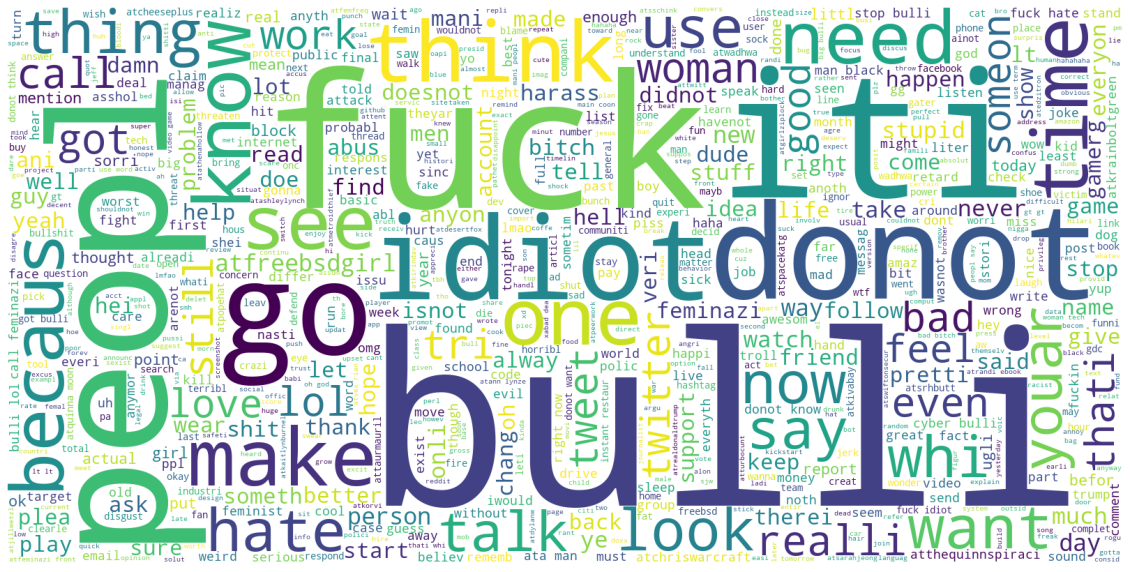

In [22]:
# for toher cyberbullying
cloudWord('other_cyberbullying')

Top words for each cyberbullying type!

In [24]:
ENCODE_DICT = {'not_cyberbullying': 0,
               'religion': 1,
               'age': 2,
               'ethnicity': 3,
               'gender': 4,
               'other_cyberbullying': 5
             }
df['sentiment'] = df.sentiment.replace(ENCODE_DICT)
print(df.sentiment.unique())
df.sample(10)

[0 4 1 5 2 3]


text  sentiment  \
44656  well fuck         that dumb nigger well i gues...          3   
30983  then i got sick, but i have work to do  soluti...          5   
5156       nothing worse than a raw cock    oh wait               0   
18435  why is no one talking about these fucking idio...          1   
7513   atjillwetzler hopefully i didn't spam you too ...          0   
33793  good to know the girl who bullied me in high s...          2   
27967                atwestcoastanime yes, i found it  )          5   
16134  evidence of what? that muslim grooming gangs p...          1   
38653  it s so funny seeing the girl that bullied me ...          2   
4945   atdjsyfer the live ones can be really good cau...          0   

                                              clean_text  
44656  well fuck dumb nigger well guess realli doe me...  
30983  got sick work solut went bought lb brisket pro...  
5156                          noth wors raw cock oh wait  
18435  whi one talk fuck idiot slit muslim mother thr...  
7513   atjillwetzl hope didnot spam bad rts odd enoug...  
33793  good know girl bulli high school still racist ...  
27967                          atwestcoastanim yes found  
16134  evid muslim groom gang prey major white sikh g...  
38653  funni see girl bulli made high school experi l...  
4945   atdjsyf live one realli good caus vibe butt do...

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# splittting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(np.array(df['clean_text']), np.array(df['sentiment']), test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((33840,), (11280,))

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
from nltk import word_tokenize

tfidf = TfidfVectorizer(use_idf = True, tokenizer = word_tokenize, min_df = 0.00002, max_df = 0.70)

X_train_df = tfidf.fit_transform(X_train.astype('U'))
X_test_df = tfidf.transform(X_test.astype('U'))

print(f"TF_IDF Model: Train features shape:{X_train_df.shape} and Test features shape:{X_test_df.shape}")

TF_IDF Model: Train features shape:(33840, 34983) and Test features shape:(11280, 34983)


In [34]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [35]:
def fit_model(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_pred, y_test)

  return accuracy

In [36]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
xgb = XGBClassifier(eval_metric="mlogloss",random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)
nb = MultinomialNB()
mlp = MLPClassifier(random_state=42)

clfs = {
    "Random Forest": rf,
    "Gradient Boosting":gb,
    "AdaBoost": ada,
    "LightGBM": lgb,
    "XGBoost": xgb,
    "Decision Tree":dt,
    "Support Vector Machine":svc,
    "Naive Bayes": nb,
    "Multilayer Perceptron":mlp
}

In [40]:
accuracy = []

for name, clf in clfs.items():
  curr_acc = fit_model(clf, X_train_df, y_train, X_test_df, y_test)
  accuracy.append(curr_acc)

In [41]:
model_df = pd.DataFrame({'Model': clfs.keys(), 'Accuracy Score': accuracy}).sort_values('Accuracy Score', ascending = False)
model_df

Model  Accuracy Score
0           Random Forest        0.840160
3                LightGBM        0.836525
6  Support Vector Machine        0.836170
1       Gradient Boosting        0.825355
5           Decision Tree        0.813032
4                 XGBoost        0.810106
8   Multilayer Perceptron        0.804876
2                AdaBoost        0.780408
7             Naive Bayes        0.725177